# Multivariate Calculus for Machine Learning

In machine learning, calculus plays a crucial role in optimization and learning algorithms. Key concepts such as gradients, derivatives, and optimization are fundamental for training models, minimizing error functions, and updating parameters efficiently.

This notebook covers key concepts in multivariate calculus, including gradients, vector calculus, gradient descent, and applications in machine learning (e.g., neural networks and linear regression).

## Index:
1. [**Basics of diferentiation**](#diff)
2. [**Vector Calculus and Gradients**](#grad)
3. [**Gradient Descent for optimization**](#desc)
4. [**Linear Regression using calculus**](#LinReg)
   1. [**Applications in Neural Networks**](#NN)

## 1. Basics of diferentiation <a class="anchor" id="diff"></a>

A derivative tells us how a function changes at any given point. The slope of a straight line is rise over run (change in y over change in x), but for curves, we use derivatives to find the slope at a particular point.

The derivative of a function f(x) is written as:

$$
f'(x) = \displaystyle \lim_{x \to 0} \frac{f(x+h) - f(x)}{h}
$$

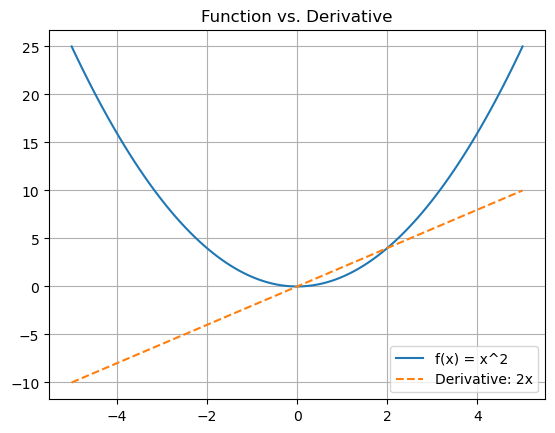

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define function
def f(x):
    return x**2

# Compute derivative
def df(x):
    return 2*x

# Generate values
x = np.linspace(-5, 5, 100)
y = f(x)

# Plot function and derivative
plt.plot(x, y, label="f(x) = x^2")
plt.plot(x, df(x), label="Derivative: 2x", linestyle="dashed")
plt.legend()
plt.title("Function vs. Derivative")
plt.grid()
plt.show()

## 2. Vector Calculus and Gradients <a class="anchor" id="grad"></a>

A gradient is a generalization of derivatives for multi-variable functions. It tells us the direction of steepest ascent.

For a function f(x,y), the gradient vector is:

$$
\nabla f = (\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})
$$

This gives the direction in which f(x,y) increases the fastest.

In [2]:
# Define a multivariable function
def f(x, y):
    return x**2 + y**2

# Compute gradient
def gradient(x, y):
    df_dx = 2*x
    df_dy = 2*y
    return np.array([df_dx, df_dy])

# Example usage
print("Gradient at (1,1):", gradient(1,1))


Gradient at (1,1): [2 2]


## 3. Gradient Descent for Optimization <a class="anchor" id="desc"></a>

Gradient Descent is a technique used to minimize a function by iteratively moving against the gradient direction. This is used in training machine learning models.

Formula for updating a parameter x:

$$
x_{new} = x - \alpha \nabla f(x)
$$

where α is the learning rate and ∇f(x) is the gradient. We subtract because the objective is to minimize the function. 

The following example calculates the gradient descent for the function f(x) = x^2:

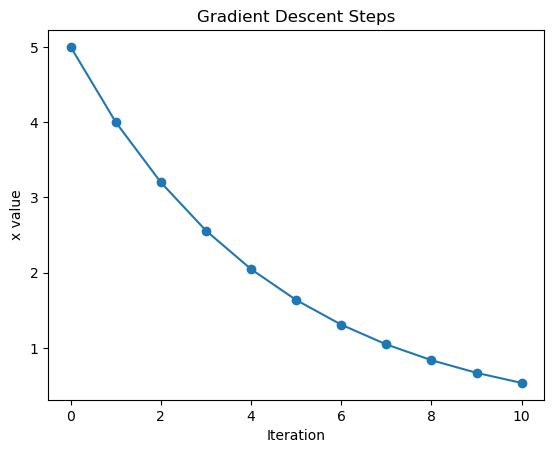

In [3]:
def gradient_descent(learning_rate=0.1, epochs=10, start_x=5):
    x = start_x  # Initial point
    history = [x]

    for _ in range(epochs):
        grad = 2*x  # Derivative of x^2
        x -= learning_rate * grad  # Update x
        history.append(x)
    
    return history

# Run gradient descent
steps = gradient_descent()

# Plot steps
plt.plot(steps, marker="o")
plt.xlabel("Iteration")
plt.ylabel("x value")
plt.title("Gradient Descent Steps")
plt.show()

## 4. Linear Regression using calculus <a class="anchor" id="LinReg"></a>

In Linear Regression, we want to minimize the Mean Squared Error (MSE) loss function:

$$
J(\omega) = \frac{1}{m}\sum(y_i - (\omega X_i + b))^2
$$

The derivative of this function helps us update the model weights using gradient descent. Replacing *(wX_i + b)* (predicted output) with *y'*, we then have:

$$
J(\omega, b) = \frac{1}{m}\sum(y_i - (\hat{y}))^2
$$

Then we calculate partial derivatives deriving via *w* and *b*:

$$
\displaystyle \frac{\partial J}{\partial \omega} = -\frac{2}{m}\sum X (y-\hat{y})
$$

$$
\displaystyle \frac{\partial J}{\partial b} = -\frac{2}{m}\sum (y-\hat{y})
$$

And afterwards we update the parameters using gradient descent:

$$
\omega = \omega - \alpha \frac{\partial J}{\partial \omega}
$$

$$
b = b - \alpha \frac{\partial J}{\partial b}
$$

We can see an example using the following code snippet:

Epoch 0, Loss: 3351.3209, w: 0.4799, b: 0.6936
Epoch 20, Loss: 1375.9976, w: 19.7459, b: -1.1028
Epoch 40, Loss: 604.6391, w: 31.8183, b: -1.8171
Epoch 60, Loss: 301.9532, w: 39.3934, b: -1.9900
Epoch 80, Loss: 182.5135, w: 44.1536, b: -1.9144
Epoch 100, Loss: 135.0849, w: 47.1495, b: -1.7440
Epoch 120, Loss: 116.1185, w: 49.0381, b: -1.5545
Epoch 140, Loss: 108.4751, w: 50.2307, b: -1.3804
Epoch 160, Loss: 105.3688, w: 50.9853, b: -1.2339
Epoch 180, Loss: 104.0952, w: 51.4635, b: -1.1171

Final Parameters: w = 51.7551, b = -1.0309


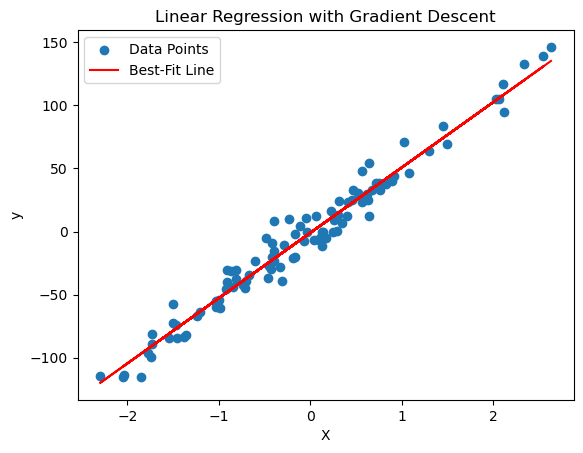

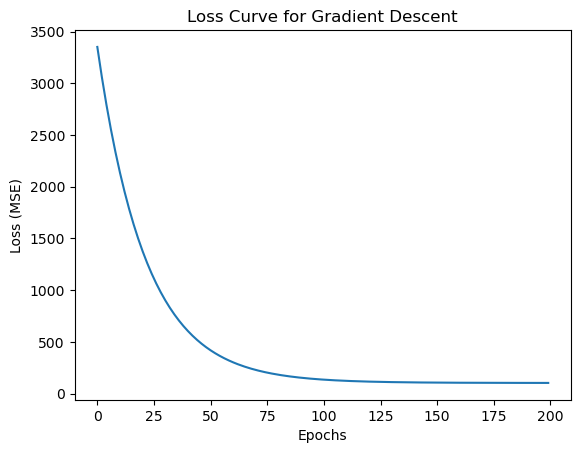

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10)
X = X.flatten()  # Flatten for easier computation

# Initialize parameters
w = np.random.randn()  # Random weight
b = np.random.randn()  # Random bias

# Hyperparameters
learning_rate = 0.01
epochs = 200  # Number of iterations

# Store loss values for visualization
loss_history = []

# Gradient Descent Loop
for epoch in range(epochs):
    y_pred = w * X + b  # Predicted values
    error = y - y_pred  # Error

    # Compute gradients
    dw = -2 * np.sum(X * error) / len(X)  
    db = -2 * np.sum(error) / len(X)

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    # Compute and store loss (MSE)
    loss = np.mean(error**2)
    loss_history.append(loss)

    # Print progress every 20 iterations
    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}, w: {w:.4f}, b: {b:.4f}")

# Final parameters
print(f"\nFinal Parameters: w = {w:.4f}, b = {b:.4f}")

# Plot data and regression line
plt.scatter(X, y, label="Data Points")
plt.plot(X, w * X + b, color='red', label="Best-Fit Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression with Gradient Descent")
plt.legend()
plt.show()

# Plot Loss Curve
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve for Gradient Descent")
plt.show()


### 4.1 Applications in Neural Networks <a class="anchor" id="NN"></a>

In Deep Learning, during the backpropagation phase, the core steps of the chain rule responsible involve gradients, in this order:

- Compute the loss function;
- Calculate the gradients using differentiation;
- Update the weights using gradient descent

This way, neural networks cannot learn without the usage of gradients. As such, every Deep Learning framework, such as TensorFlow and Pytorch, makes use of calculus in order to optimize models.

## Resources

- [A Gentle Introduction to Multivariate Calculus](https://www.machinelearningmastery.com/a-gentle-introduction-to-multivariate-calculus/)
- [Multivariate Calculus for Machine Learning](https://www.geeksforgeeks.org/multivariable-calculus-for-machine-learning/)
- [Mathematics for Machine Learning: Multivariate Calculus](https://www.youtube.com/playlist?list=PLiiljHvN6z193BBzS0Ln8NnqQmzimTW23)
- [Chain Rules for Hessian and Higher Derivatives Made Easy by Tensor Calculus](https://arxiv.org/abs/1911.13292)
- [Mathematics for Machine Learning and Data Science: Optimization with Mathematica Applications](https://arxiv.org/abs/2302.05964)